## 1.- Importing ROI module

In [6]:
import sys
sys.path.append('../')

import acalib
import acalib.io.formats as io
import acalib.roi as ri
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 2.- Reading Data to AContainer

INFO:astropy:Processing HDU 0 (Image)


INFO: Processing HDU 0 (Image) [acalib.io.formats]
INFO

INFO:astropy:4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES


: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.formats]


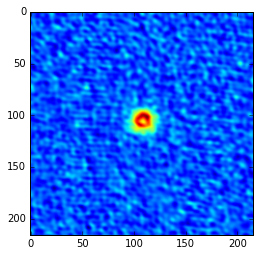

(71, 216, 216)

In [7]:
binpath = '../bindata/'
ss = ri.SpectraSketcher()
gs = ri.GaussianSegmentation()
c = acalib.AContainer()
io.load_to_cont(binpath+'ALMA01000740.fits',c)
cube = c.primary
plt.imshow(cube.stack())
plt.show()
cube.shape()

## 3.- Cube Spectra Sketch

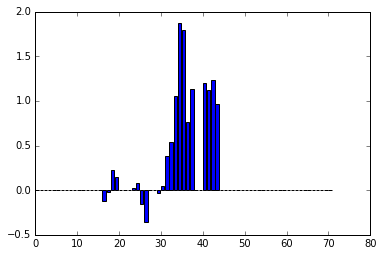

[slice(16, 20, None),
 slice(23, 27, None),
 slice(29, 38, None),
 slice(40, 44, None)]

In [16]:
#Getting frecuencies
xs = cube.shape()[0]
ys = cube.shape()[1]
frecs_len = cube.shape()[0]
frecs = range(frecs_len)

#Creating spectra sketch
spectra,slices = ss.cube_spectra(cube,(xs*ys)/20)

#Plotting spectra
plt.bar(frecs,spectra)
plt.show()
slices

## 4.- Create Slices 

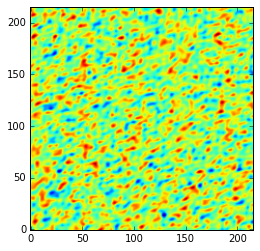

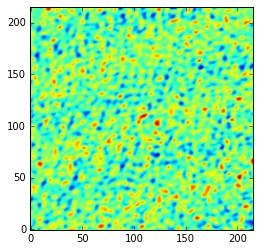

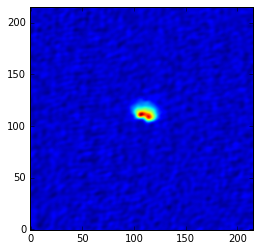

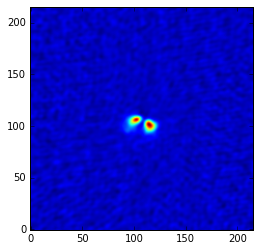

In [17]:
ppslices = []
for slic in slices:
    image = ss.vel_stacking(cube,slic.start,slic.stop)
    ppslices.append(image)
    plt.imshow(image, origin='image')
    plt.show()

## 5.- Run Segmentation on each slice 

Return Scikit-image RegionProp objects http://scikit-image.org/docs/dev/api/skimage.measure.html#regionprops

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


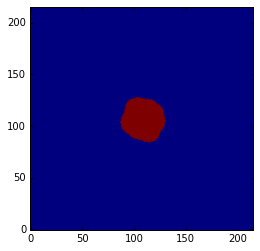

In [5]:
fts_all = []
for image in ppslices:
    fts = gs.gaussian_mix(image)
    fts_all.append(fts)